In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
import seaborn as sns
import os
import sys
import logging
from pathlib import Path

# Set up file paths
file_path = str(Path().absolute())
project_path = str(Path().absolute().parent.parent)
exp_name = file_path.split('/')[-1]

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logging.info(f"Current file directory: {file_path}")
logging.info(f"Current project directory: {project_path}")

os.chdir(project_path)
sys.path.append(project_path)

2023-08-06 21:02:28,940 - INFO - Current file directory: /Users/septentrionalem/Desktop/study/thesis_2023_travelling_waves/exp/spectral-analysis
2023-08-06 21:02:28,941 - INFO - Current project directory: /Users/septentrionalem/Desktop/study/thesis_2023_travelling_waves


In [2]:
w12_18_path = 'res/spectral-analysis/w12_18.spont/spectral_properties_w12_18.spont.csv'
w12_18 = pd.read_csv(w12_18_path)
w12_07_path = 'res/spectral-analysis/w12_07.spont/spectral_properties_w12_07.spont.csv'
w12_07 = pd.read_csv(w12_07_path)

w12_18['Experiment'] = 'w12_18'
w12_07['Experiment'] = 'w12_07'

df = pd.concat([w12_18, w12_07])
print(df.head())

  Name of probe  Interval id    State  Channel  Depth   Alpha power  \
0          ECoG            4  upstate        0      0  5.810022e-10   
1          ECoG            6  upstate        0      0  3.680799e-10   
2          ECoG            9  upstate        0      0  2.049406e-10   
3          ECoG           13  upstate        0      0  6.974571e-10   
4          ECoG           15  upstate        0      0  3.156490e-10   

     Beta power   Gamma power   Total power  Central frequencies  Peak powers  \
0  4.528932e-11  9.157347e-12  2.504600e-08            30.071736     1.806707   
1  5.610873e-11  5.500875e-12  2.217037e-08            68.995807     1.200479   
2  5.490504e-11  4.554889e-12  1.812931e-08            50.883397     1.043668   
3  7.423645e-11  8.279674e-12  1.995950e-08            56.969579     0.846109   
4  2.358275e-10  5.499849e-12  1.353284e-08            63.845121     1.619867   

   Bandwidths                             Power spectrum (freqs)  \
0    3.925317  [  

ECoG: Mann-Whitney U test statistic = 4199742280.0, p-value = 0.0
Probe 1 and 2: Mann-Whitney U test statistic = 1085124723.0, p-value = 0.0


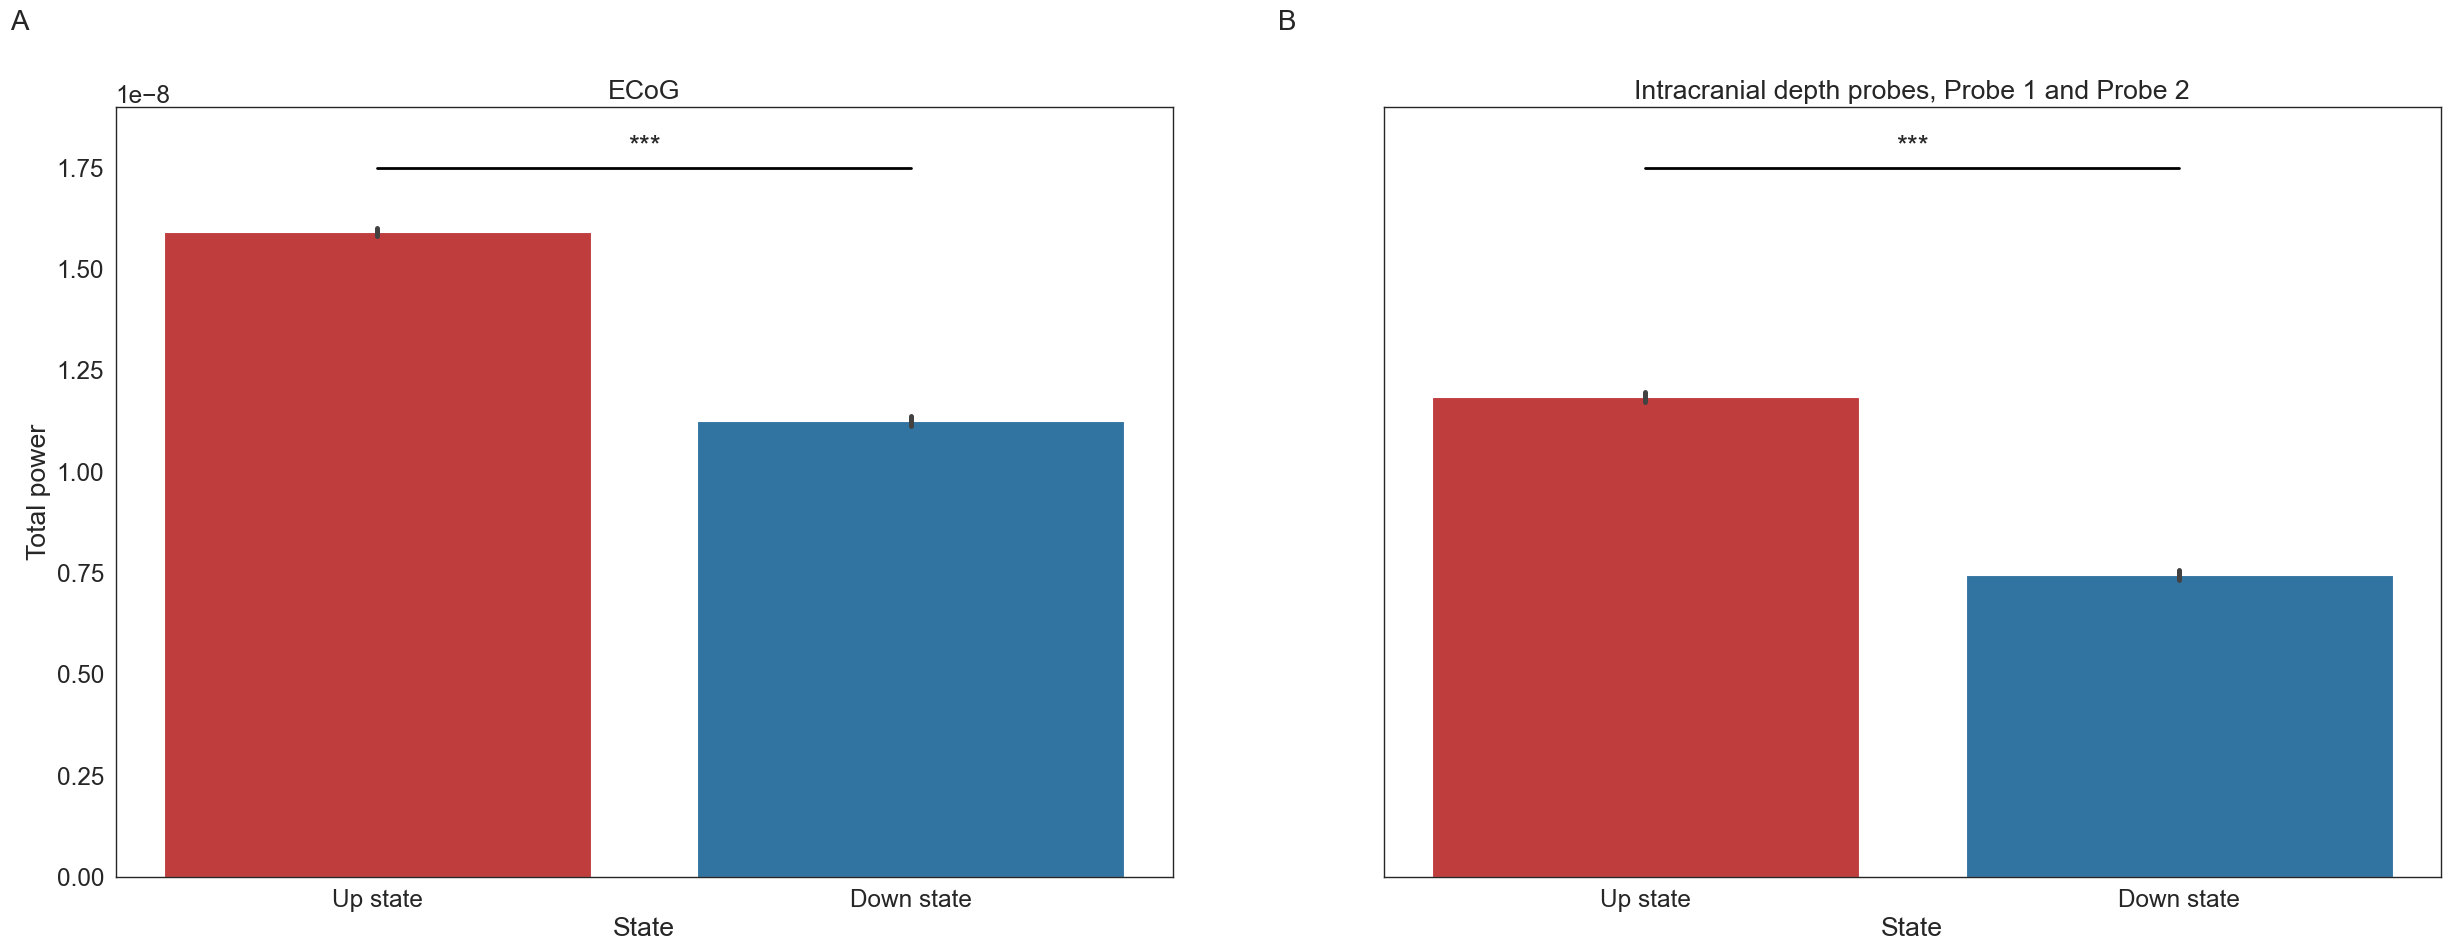

In [23]:
from scipy.stats import mannwhitneyu

# Set plotting style
sns.set_context('paper', font_scale=2, rc={'lines.linewidth': 2})
sns.set_palette('colorblind')
sns.set_style('white')

# Set color palette and style
color_palette = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
sns.set_palette(color_palette)


# Set GridSpec for the figure
fig = plt.figure(figsize=(30, 10))
gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0]) # axis for ECoG
ax2 = fig.add_subplot(gs[0, 1]) # axis for Probe 1 and 2

# Plot boxplots with State on x-axis and Total power on y-axis
sns.barplot(x='State', y='Total power', data=df[df['Name of probe'] == 'ECoG'], ax=ax1)
sns.barplot(x='State', y='Total power', data=df[df['Name of probe'] != 'ECoG'], ax=ax2)

# Add titles to the subplots
ax1.set_title('ECoG')
ax2.set_title('Intracranial depth probes, Probe 1 and Probe 2')

# Also add letters to the subplots 
ax1.text(-0.1, 1.1, 'A', transform=ax1.transAxes, fontsize=20)
ax2.text(-0.1, 1.1, 'B', transform=ax2.transAxes, fontsize=20)


# Add ylim signle for both subplots
ax1.set_ylim([0, 1.9 * 10**-8])
ax2.set_ylim([0, 1.9 * 10**-8])

# Remove ticks from y-axis on ax2
ax2.set_yticks([])
ax2.set_ylabel('')

# Set x-axis tick labels 
ax1.set_xticklabels(['Up state', 'Down state'])
ax2.set_xticklabels(['Up state', 'Down state'])

# Test using Mann-Whitney U test whether the total power in the two states is significantly different
# between the two probes

# ECoG
# Get the total power in the two states
total_power_ecog_upstate = df[(df['Name of probe'] == 'ECoG') & (df['State'] == 'upstate')]['Total power']
total_power_ecog_downstate = df[(df['Name of probe'] == 'ECoG') & (df['State'] == 'downstate')]['Total power']

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(total_power_ecog_upstate, total_power_ecog_downstate)
print(f'ECoG: Mann-Whitney U test statistic = {stat}, p-value = {p}')

# Add significance stars to the plot for ECoG
# Add line connecting two bars
ax1.plot([0, 1], [1.75 * 10**-8, 1.75 * 10**-8], color='black', linewidth=2)

# Add significance stars
if p < 0.001:
    ax1.text(0.5, 1.8 * 10**-8, '***', horizontalalignment='center', verticalalignment='center', fontsize=20)
elif p < 0.01:
    ax1.text(0.5, 1.8 * 10**-8, '**', horizontalalignment='center', verticalalignment='center', fontsize=20)
elif p < 0.05:
    ax1.text(0.5, 1.8 * 10**-8, '*', horizontalalignment='center', verticalalignment='center', fontsize=20)

# not ECoG
# Get the total power in the two states
total_power_probe1_upstate = df[(df['Name of probe'] != 'ECoG') & (df['State'] == 'upstate')]['Total power']
total_power_probe1_downstate = df[(df['Name of probe'] != 'ECoG') & (df['State'] == 'downstate')]['Total power']

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(total_power_probe1_upstate, total_power_probe1_downstate)
print(f'Probe 1 and 2: Mann-Whitney U test statistic = {stat}, p-value = {p}')

# Add significance stars to the plot for ECoG
# Add line connecting two bars
ax2.plot([0, 1], [1.75 * 10**-8, 1.75 * 10**-8], color='black', linewidth=2)

# Add significance stars
if p < 0.001:
    ax2.text(0.5, 1.8 * 10**-8, '***', horizontalalignment='center', verticalalignment='center', fontsize=20)
elif p < 0.01:
    ax2.text(0.5, 1.8 * 10**-8, '**', horizontalalignment='center', verticalalignment='center', fontsize=20)
elif p < 0.05:
    ax2.text(0.5, 1.8 * 10**-8, '*', horizontalalignment='center', verticalalignment='center', fontsize=20)


# Save the figure
fig.savefig(f'res/spectral-analysis/intervals-spectra.png', dpi=300, bbox_inches='tight')